# [IAPR][iapr]: Lab 1 ‒  Image segmentation


**Group ID:** xx

**Author 1 (sciper):** Student Name 1 (xxxxx)  
**Author 2 (sciper):** Student Name 2 (xxxxx)   
**Author 3 (sciper):** Student Name 3 (xxxxx)   

**Release date:** 8.03.2023  
**Due date:** 24.03.2022 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.

[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os
import numpy as np

data_base_path = os.path.join(os.pardir, 'data')
print(data_base_path)
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')

if not os.path.exists(tar_path):
    raise Exception('Path to is not valid {}'.format(tar_path))
    
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

..\data


---
## Part 1: Segmentation


### 1.0 Intro

In this exercise, you will be given two images. 

* `mucinous_adeno.jpg`: The image depicts a tissue sample from mucinous adenocarcinoma in colorectal cancer. The data is taken from the Cancer Genome Atlas (TCGA) which is an open-source database of different cancer types. Here you can see a tissue taken from a patient and stained using hematoxylin (purple) and eosin (pink) staining. The hematoxylin stains cell nuclei with a purplish blue, and the eosin stains the extracellular matrix and cytoplasm in pink.

* `mucinous_adeno_gt.jpg`: The second image is a coarse annotation of what is regarded as the so-called mucinous area. The mucinous area can be identified as a gray area tainted with purple. The presence of a large amount of mucin is a sign of a defect of normal epithelial cells that start to produce an unreasonable amount of mucin.


### 1.1 Tasks

You will be asked to extract the mucinous area using various approaches:

- [ ] Thresholding
- [ ] Morphology
- [ ] Region growing


### 1.1 Brain image visualization

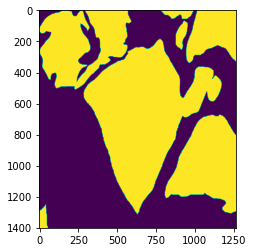

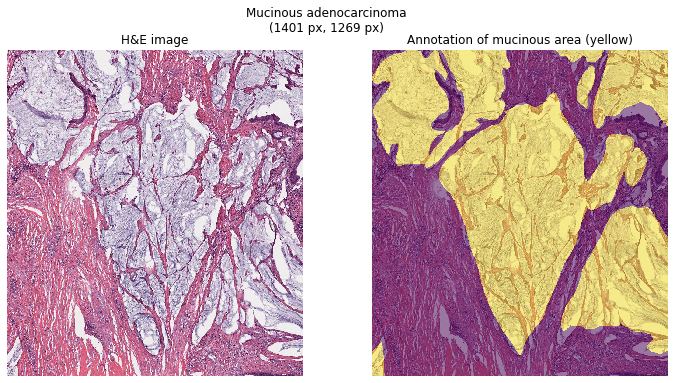

In [2]:
import skimage.io
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load images
path_to_image = os.path.join(data_base_path, data_folder, "mucinous_adeno.jpg")
path_to_gt = os.path.join(data_base_path, data_folder, "mucinous_adeno_gt.jpg")
adeno_img = skimage.io.imread(path_to_image)
adeno_gt = skimage.io.imread(path_to_gt) > 128
plt.imshow(adeno_gt)            

# Get size of the image in px
im_h, im_w, im_c = adeno_img.shape

# Display MRI image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot image
ax[0].imshow(adeno_img, interpolation='nearest')
ax[0].set_title('H&E image'.format(im_h, im_w))
ax[0].axis('off')

# Plot image with overlay
ax[1].imshow(adeno_img, interpolation='nearest')
ax[1].imshow(adeno_gt, alpha=0.5, interpolation='nearest')
ax[1].set_title('Annotation of mucinous area (yellow)')
ax[1].axis('off')
plt.suptitle("Mucinous adenocarcinoma\n({} px, {} px)".format(im_h, im_w))
plt.show()

---
### 1.2 Thresholding (4pts)
#### 1.2.1 RGB & Hue (1 pts)

Display the histogram for each channel (R, G, and B) as well as the histogram for the H (hue) channel. Note that you can use [rgb2hsv](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2hsv) to convert an RGB image to an HSV image and then extract the hue.

H&E is of type <class 'numpy.ndarray'>, has dimensions (1401, 1269, 3), and a total number of 5333607 elements


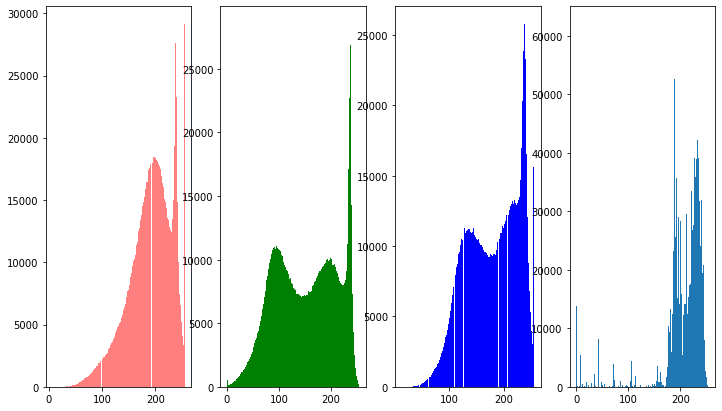

In [3]:
# to do
print('H&E is of type {}, has dimensions {}, and a total number of {} elements'.format(
    type(adeno_img), adeno_img.shape, adeno_img.size))

nb_bins = 256


# Separate the channels
r = adeno_img[:,:,0]
g = adeno_img[:,:,1]
b = adeno_img[:,:,2]

adeno_hsv = skimage.color.rgb2hsv(adeno_img)

h = adeno_hsv[:,:,0]*255

ch_list=[r,g,b,h]
# Set the number of bins
nb_bins = 256

# Plot the histograms
fig, ax = plt.subplots(1, 4, figsize=(12, 7))




#ax[0].hist(r.ravel(), bins=nb_bins, color='red', alpha=0.5, label='Red')
#ax[0].hist(g.ravel(), bins=nb_bins, color='green', alpha=0.5, label='Green')
#ax[0].hist(b.ravel(), bins=nb_bins, color='blue', alpha=0.5, label='Blue')
#ax[0].xlabel('Pixel intensity')
#ax[0].ylabel('Number of pixels')
#ax[0].legend()

ax[0].hist(r.ravel(), bins=nb_bins, color='red', alpha=0.5, label='Red')
ax[1].hist(g.ravel(), bins=nb_bins, color='green', label='Red')
#ax[1].xlabel('Pixel intensity')
#ax[1].ylabel('Number of pixels')
ax[2].hist(b.ravel(), bins=nb_bins, color='blue', label='Blue')
ax[3].hist(h.ravel(), bins=nb_bins)


plt.show()


#### 1.2.2 Apply Thresholding (2 pts)

For each histogram find the threshold(s) that work the best to isolate the mucinous area. Display the image after thresholding of each channel as well as the error between your prediction ($im$) and the annotations ($gt$) using the formula:

$$error = 1 - \left( \frac{1}{IJ} \sum_{i,j} im_{i,j} == gt_{i, j} \right)$$

Here, I and J are the dimension of the image.

[0.44522065461516014, 0.26148214519742463, 0.2735150902569312, 0.18894305485949758]
[195, 145, 177, 213]


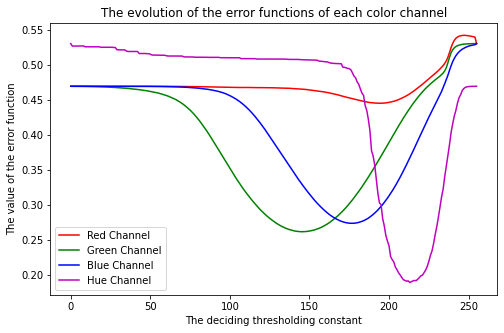

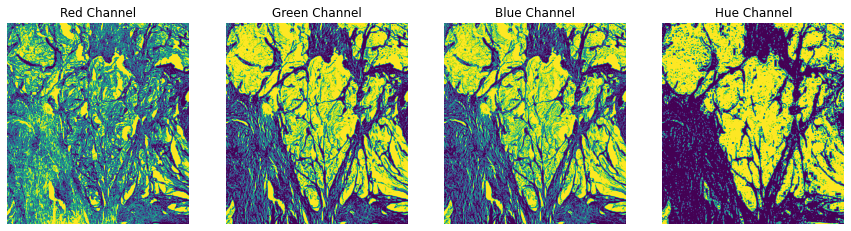

In [4]:
# to do
import skimage.filters

def error_func (width, height, image, target_image):
    
    equal=np.equal(image, target_image)
    sum=np.sum(equal)
            
    return 1- ((1/(width*height))*sum)


error_list=np.empty((256,4))
band=np.linspace(0,255,256)

min_errors= []
threshold_values= []
binary_images= []

fig_plot, ax_plot=plt.subplots(1,1, figsize=(8,5))
fig, ax=plt.subplots(1,len(ch_list), figsize=(15,6))

ax_titles = ["Red Channel", "Green Channel", "Blue Channel", "Hue Channel"]
colors = ['r', 'g', 'b', 'm']


for ch_num in range(0,len(ch_list)):

    channel=ch_list[ch_num]
    
    for tvalue in band:

        if ch_num==3:
            error_list[int(tvalue)][ch_num]=error_func(channel.shape[0], channel.shape[1], channel<tvalue, adeno_gt)
        else:
            error_list[int(tvalue)][ch_num]=error_func(channel.shape[0], channel.shape[1], channel>tvalue, adeno_gt)
        
    min_errors.append(np.min(error_list[:,ch_num]))
    threshold_values.append(np.argmin(error_list[:,ch_num], axis=0))

    if ch_num==3:
        binary_images.append(channel<threshold_values[ch_num])
    else:
        binary_images.append(channel>threshold_values[ch_num])

    ax[ch_num].imshow(binary_images[ch_num])
    ax[ch_num].set_title(ax_titles[ch_num])
    ax[ch_num].axis('off')
    ax_plot.plot(band, error_list[:, ch_num], label = ax_titles[ch_num], color=colors[ch_num])
    ax_plot.legend(loc='lower left')


ax_plot.set_title("The evolution of the error functions of each color channel")
ax_plot.set_xlabel("The deciding thresholding constant")
ax_plot.set_ylabel("The value of the error function")

    
print(min_errors)
print(threshold_values)
plt.show()

#### 1.2.3 Best Thresholding (1 pts)

Based on your previous findings, set the best threshold(s) and create the final mask as the variable `mask_thesholding`

In [5]:
# TODO: replace variabel with your own threshod
mask_thesholding = binary_images[3]

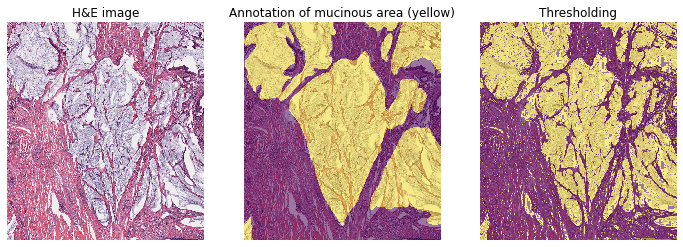

In [7]:
# Display MRI image
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

# Plot image
ax[0].imshow(adeno_img, interpolation='nearest')
ax[0].set_title('H&E image'.format(im_h, im_w))
ax[0].axis('off')

ax[1].imshow(adeno_img, interpolation='nearest')
ax[1].imshow(adeno_gt, alpha=0.5, interpolation='nearest')
ax[1].set_title('Annotation of mucinous area (yellow)')
ax[1].axis('off')

ax[2].imshow(adeno_img, interpolation='nearest')
ax[2].imshow(mask_thesholding, alpha=0.5, interpolation='nearest')
ax[2].set_title('Thresholding')
ax[2].axis('off')

plt.show()

---

### 1.3 Morphology (5pts)

To proceed, use the best results of the previous model (namely `mask_thesholding`) as the starting point. In this exercise we will try to clean the mask using morphology.

* A (2pts): Try the following operation [closing](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.closing), [opening](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.opening) with [disk](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.disk) size of: $1, 2, 5, 10$. Comment on the quality of the results.

* B (2pts): Try the following operation [remove_small_holes](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.remove_small_holes), [remove_small_objects](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.remove_small_objects) with size of: $10, 50, 100, 500$. Comment on the quality of the results.

* C (1pts): Based on your previous results, can you find a combination of the functions that improve your results? Plot the best result along with the error rate. Save the mask as the variable `mask_morph`

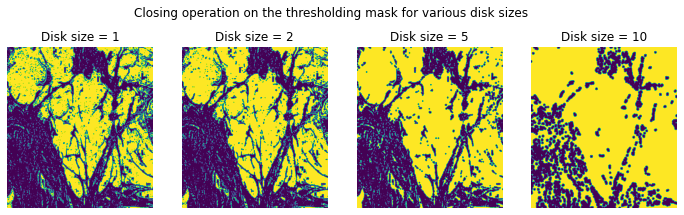

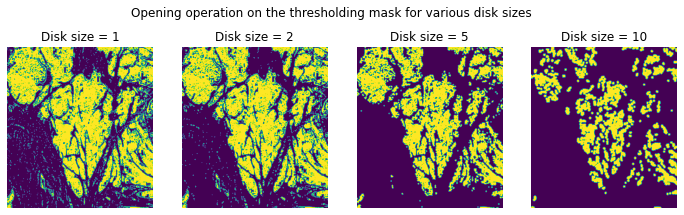

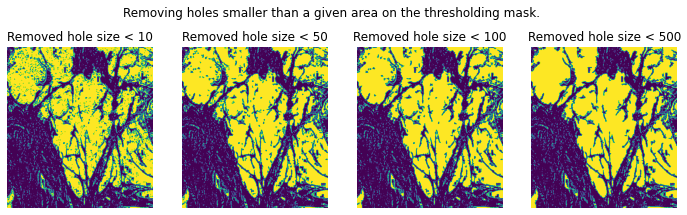

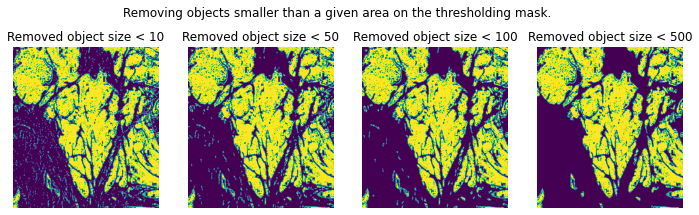

In [8]:
values1 = [1, 2, 5, 10]
fig_closing, ax_closing =plt.subplots(1,4, figsize=(12, 3.5))
fig_opening, ax_opening =plt.subplots(1,4, figsize=(12, 3.5))
fig_closing.suptitle("Closing operation on the thresholding mask for various disk sizes")
fig_opening.suptitle("Opening operation on the thresholding mask for various disk sizes")


for i in range(0, len(values1)):
    
    disk=skimage.morphology.disk(values1[i])
    closed=skimage.morphology.closing(mask_thesholding, disk)
    opened=skimage.morphology.opening(mask_thesholding, disk)
    
    ax_closing[i].imshow(closed)
    ax_closing[i].set_title(str("Disk size = ")+str(values1[i]))
    ax_closing[i].axis('off')

    ax_opening[i].imshow(opened)
    ax_opening[i].set_title(str("Disk size = ")+str(values1[i]))
    ax_opening[i].axis('off')

values2 = [10, 50, 100, 500]

fig_rm_holes, ax_rm_holes =plt.subplots(1,4, figsize=(12, 3.5))
fig_rm_objects, ax_rm_objects =plt.subplots(1,4, figsize=(12, 3.5))
fig_rm_holes.suptitle("Removing holes smaller than a given area on the thresholding mask.")
fig_rm_objects.suptitle("Removing objects smaller than a given area on the thresholding mask.")

for i in range(0, len(values2)):
    
    threshold_area= values2[i]
    rm_holes=skimage.morphology.remove_small_holes(mask_thesholding, threshold_area)
    rm_objects=skimage.morphology.remove_small_objects(mask_thesholding, threshold_area)
    
    ax_rm_holes[i].imshow(rm_holes)
    ax_rm_holes[i].set_title(str("Removed hole size < ")+str(values2[i]))
    ax_rm_holes[i].axis('off')

    ax_rm_objects[i].imshow(rm_objects)
    ax_rm_objects[i].set_title(str("Removed object size < ")+str(values2[i]))
    ax_rm_objects[i].axis('off')



0.0961454415370312


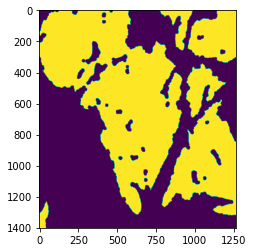

In [9]:
fig_c, ax_c = plt.subplots(1,1)
disk=skimage.morphology.disk(5)


disk=skimage.morphology.disk(10)
rso=skimage.morphology.remove_small_objects(mask_thesholding, 5000)


closing=skimage.morphology.closing(rso, disk)



print(error_func(mask_thesholding.shape[0], mask_thesholding.shape[1], closing, adeno_gt))

ax_c.imshow(closing)


---
### 1.4 Region growing (5pts)

In this exercise you will implement from scratch your own region growing algorithm. Choose one of the image channel (R/G/B/H) as the source image. You can use multiple seed point to achieve better results. Plot the best result along with the error rate. Save the mask as the variable `mask_region`.

Error:  0.16457005549902726


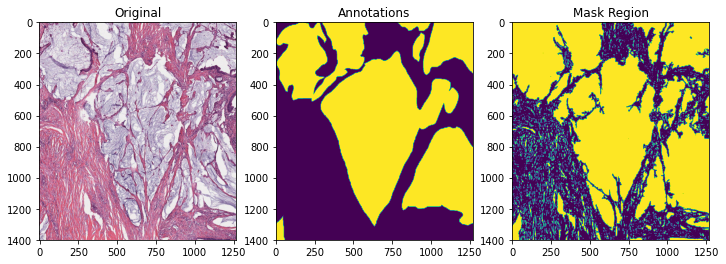

In [144]:
import cv2
import numpy as np


hsv_img = cv2.cvtColor(adeno_img, cv2.COLOR_BGR2HSV)
img = hsv_img[:, :, 0]


def region_grow(img, seed, thresh):
   
    mask = np.zeros_like(img)
    seed_list = [seed]
    
    
    
    neighbors = [(-1,-1), (-1, 0), (-1, 1), (0, 1), (1,1), (1,0), (1,-1), (0,-1)]


    while seed_list:
        current_seed = seed_list.pop(0)

        for neighbor in neighbors:
            row = current_seed[0] + neighbor[0]
            col = current_seed[1] + neighbor[1]

            if row >= 0 and row < img.shape[0] and col >= 0 and col < img.shape[1]:
                if mask[row, col] == 0:
                    if abs(int(img[row, col]) - int(img[current_seed])) <= thresh:
                        # Mark the neighbor as visited and add it to the mask and seed list
                        mask[row, col] = 255
                        seed_list.append((row, col))

    return mask

seeds = [(200, 200), (200,300), (350,250), (500,150), (750,750), (1250,1250), (100,1150), (1100,1100), (200,1250), (600,50), (900,200), (750,150)]
#seeds = [(100, 200), (750,750), (805,850)]
thresh = 1.2


masks = []
for seed in seeds:
    masks.append(region_grow(img, seed, thresh))

# Combine the masks
mask_region = np.zeros_like(img)
for mask in masks:
    mask_region = cv2.bitwise_or(mask_region, mask)

#find the optimal threshold value
#ret, thresh_region = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)



img_array = np.array(mask_region)

img_array_inverted = np.where(img_array == 0, 255, 0)
img_array_inverted = img_array_inverted/255

error_rate = error_func(img_array_inverted.shape[0], img_array_inverted.shape[1], img_array_inverted, adeno_gt)

print("Error: ", error_rate)

# Show the results

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

axs[0].imshow(adeno_img)
axs[0].set_title('Original')
axs[1].imshow(adeno_gt)
axs[1].set_title('Annotations')
axs[2].imshow(img_array_inverted)
axs[2].set_title('Mask Region')
plt.show()



---
### 1.5 Method comaprison (1pt)

In this section we display the overall outputs. Please make sure that you create the variables `mask_thesholding`, `mask_morph`, and `mask_region` to properly display the output. Comment on the results and what you think would be the best approach.

#### Add your comments here
In the three techniques used, we have noticed an error rate that varies between 9 to 19%. Looking at the images, the thresholding technique is less blurry than the others but is more noisy. After applying morphology techniques (remove_small_objects then closing) on the mask_thresholding, the resulted image is not exactly the same as the annotation (adeno_gt) with some holes that are still not filled and excessive closing. However, the noise is completely removed, thus, the error rate is minimized by almost 10%. The region growing approach is more efficient than the thresholding one, as a good amount of noises on the mucinous area is removed but there are also some important parts that are not removed. To conclude, although the error rates are quite low, we can do more. A good approach would be combining the region growing algorithm with morphology techniques.


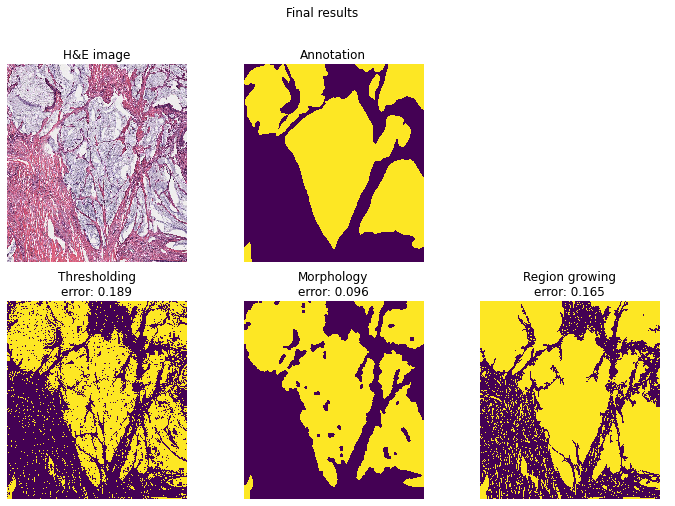

In [145]:
error_th = 1- (mask_thesholding == adeno_gt).mean()
error_morph = 1- (closing == adeno_gt).mean()
error_region = 1- (img_array_inverted == adeno_gt).mean()


# Display MRI image
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

# Plot image
ax[0, 0].imshow(adeno_img, interpolation='nearest')
ax[0, 0].set_title('H&E image'.format(im_h, im_w))

# Plot image with overlay
ax[0, 1].imshow(adeno_gt, interpolation='nearest')
ax[0, 1].set_title('Annotation')

# Plot estimation using thresholding
ax[1, 0].imshow(mask_thesholding, interpolation='nearest')
ax[1, 0].set_title('Thresholding\nerror: {:.3f}'.format(error_th))

# Plot estimation using Contour detection
ax[1, 1].imshow(closing, interpolation='nearest')
ax[1, 1].set_title('Morphology\nerror: {:.3f}'.format(error_morph))


# Plot estimation using Region growing
ax[1, 2].imshow(img_array_inverted, interpolation='nearest')
ax[1, 2].set_title('Region growing\nerror: {:.3f}'.format(error_region))


[a.axis('off') for a in ax.ravel()]


plt.suptitle("Final results")
plt.show()

# ---
## Part 2: Axon segmentations (10 points)

#### Intro 

Axon segmentation is vital to neuroscience research as it enables the study of neurons' morphology and connectivity. We will conduct two exercises to evaluate the impact of your segmentation algorithms under different independent artefacts. Each exercise consists of a synthetic **Ground Truth (GT)** and two more images simulating a specific artifact.

The **Ground Truth**  has tree main compartments. 1) The inner part of the axon. 2) The outer layer of the axon (called myelin) and the extracellular slace (the background of the image). 

The task consists into segmenting the three main compartments in the image to compute the inner-axon and outer-axon radii distribution.


To compute the radii, we suggest the following approximation.
$$\hat{r}_{I}= \sqrt{\frac{A_{yellow}}{\pi}}$$
$$\hat{r}_{O}= \sqrt{\frac{A_{yellow} + A_{blue}}{\pi}}$$
Where **A** is the corresponding area of the comparments. 
**Using this image as reference** 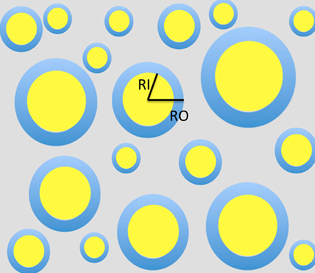

#### Artifacts simulated:

Excercise 1) Two images with different levels of SNR (signal to noise ratio). The images have rician noise.
Exercise  2) Two images adquired using a fraction of the fourier space. Only Lowest frequency are used to reconstruct the image. (simulating fast aquisitions in MRI)

Ensure your algorithm works on the GT before you go to the test cases with artifacts. Apply any preprocessing needed to the image. The preprocessing can be different for each type of image.

### Tasks

For each exercise we ask to:

1) Segment the images with the following colors: blue the inner part of the axon, red the outer part of the axon (myelin) and white for the backround(example) 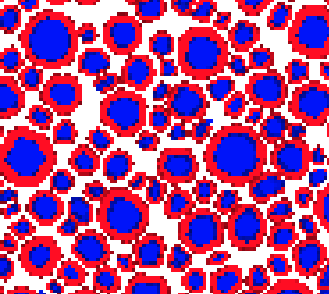

2) Count the number of axons obtained in the sample, calculate the radii for each axons, and display a radii histogram for the each of the images(GT and test cases).

In the exercises, assume that each pixel side is $(0.1 \mu m)$, i.e. a pixel has an area of $(0.01 \mu m^2 )$

## Grading 
The answers does not have to be perfect, they just be a good approximation.

1. Developing an algorithm that works for the two GT images. **(3 points)** 
2. Use preprosesing to prepare the images with SNR and the Low frequencies.  (**1 point** for SNR preprocesing , **1 point** for Low-frequency images preprocesing)
3. Running the algorithm in the test images. **1/2 point** SNR, **1/2 point** Low freqs
4. Computing and plotting radii distributions **(1 point)**
5. Explaining and discussing your implementation. **(3 points )**
    Try to be specific, not necessarily long. In the discussion include:
 1. What worked? 
 2. What did not work?
 3. Why do you think it does not work? 
 4. How could you improve your algorithms as future work?  Try to avoid general comments like "using deep learinng" 
 
**Extra points: Real data example (3 points), the algorithm should display a _good enough_ segmentation.**

### 2.1 SNR

In [ ]:
data_base_path

'../data'

../data


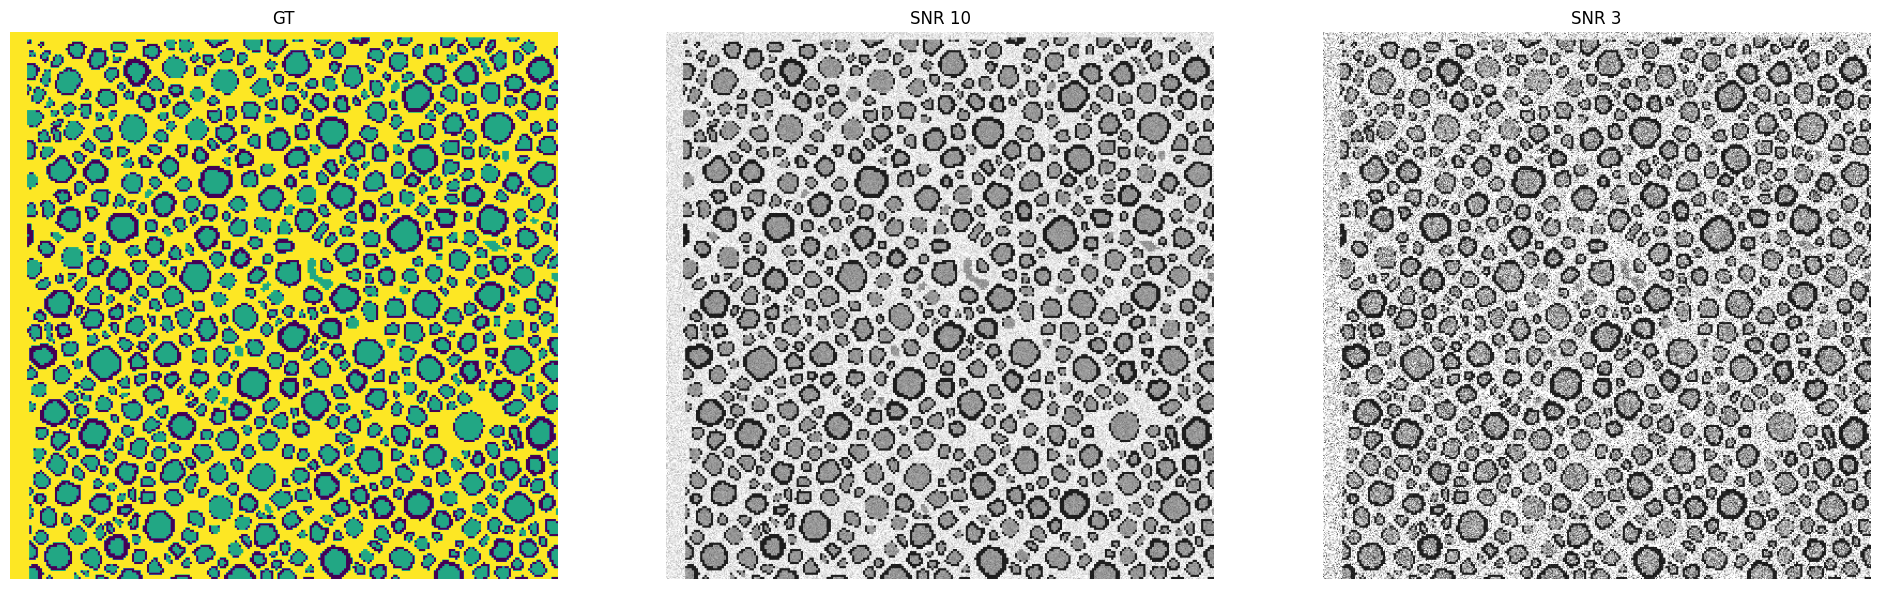

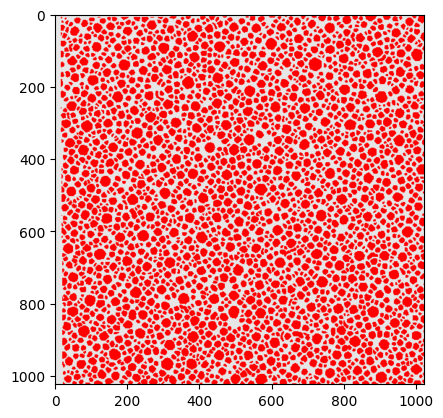

In [40]:
import cv2
import matplotlib.pyplot as plt
import skimage.io

data_base_path = os.path.join(os.pardir, 'data')
print(data_base_path)
data_folder = 'lab-01-data'

path_folder = os.path.join(data_base_path, data_folder) + '/' 

files = ["GT_0.png"  , "test_0_0.png" , "test_0_1.png"]
gt_0 = cv2.imread(path_folder+ files[0], cv2.IMREAD_GRAYSCALE)

test=skimage.io.imread(path_folder+files[0])
snr_10 = cv2.imread(path_folder+ files[1])
snr_3 = cv2.imread(path_folder+ files[2])

images = [gt_0 , snr_10, snr_3]
im_names = ["GT" , "SNR 10" , "SNR 3"]
fig, axes = plt.subplots(1, 3, figsize=(24, 12))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(im[0:512,0:512])
    ax.axis('off')
    ax.set_title(nm)
plt.show()


gt_new=gt_0<230
gt_new=gt_new.astype(int)

indices= np.where(gt_new==1)

gt_new = cv2.imread(path_folder+ files[0])
for i in range(0, len(indices[1])):
    gt_new[indices[0][i]][indices[1][i]]=(255,0,0)
    
plt.imshow(gt_new) ## color is inverted. (255,0,0) is blue in opencv and red in amtplotlib library)




### 2.1.1 Preprocessing 

 % add your images about preprocessing

### 2.1.2 Results Segmetations( 3 points GT  , 1 point Test case 1, 1 point test case 2)

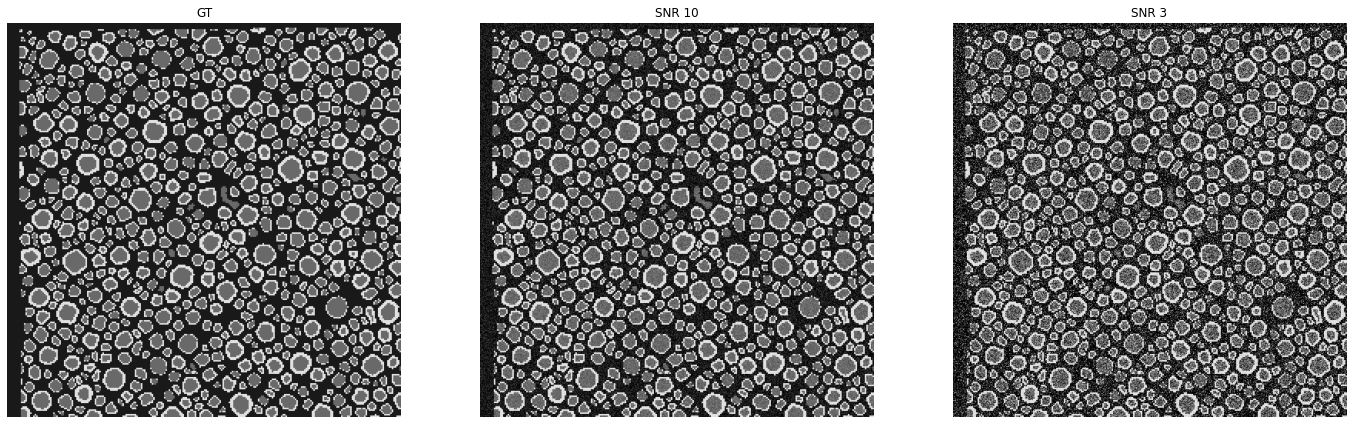

In [ ]:
images = [gt_0 , snr_10, snr_3]
im_names = ["GT" , "SNR 10" , "SNR 3"]
fig, axes = plt.subplots(1, 3, figsize=(24, 24))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(255- im[0:512,0:512])
    ax.axis('off')
    ax.set_title(nm)
plt.show()




### 2.1.3 Radii histrograms (2 point)

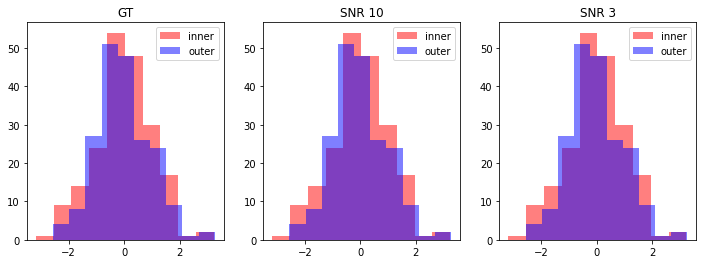

In [ ]:
## results Radii distribution. proposal feel free to change it
import numpy as np


rads_outer = np.random.normal(0, 1, 200)
rads_inner = np.random.normal(0, 1, 200)


rads_gt = [ rads_inner ,rads_outer]
rads_test0 = [ rads_inner ,rads_outer]  # your result
rads_test1 = [ rads_inner ,rads_outer]  # your result

all_rads= [rads_gt , rads_test0 , rads_test1] 

images = [gt_0 , snr_10, snr_3]
im_names = ["GT" , "SNR 10" , "SNR 3"]
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, rads, nm in zip(axes.ravel(), all_rads, im_names):
    ax.hist(rads[0]  , color = "red" , label = "inner" ,alpha= 0.5)
    ax.hist(rads[1]  , color = "blue" , label = "outer" ,alpha= 0.5)
    ax.legend()
    ax.set_title(nm)
plt.show()


### 2.4 Low frequencies

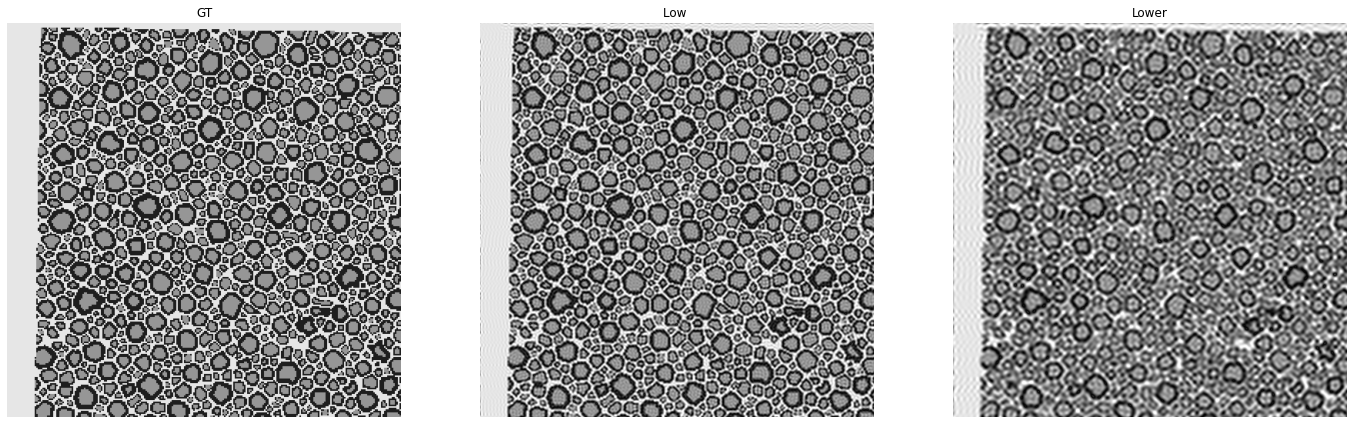

In [ ]:

files = ["GT_3.png"  , "test_3_0.png" , "test_3_1.png"]
path = "data/"
gt_3 = cv2.imread(path_folder+ files[0])
lowfreq0 = cv2.imread(path_folder+ files[1])
lowfreq1 = cv2.imread(path_folder+ files[2])

images = [gt_3 , lowfreq0, lowfreq1]
im_names = ["GT" , "Low " , "Lower"]
fig, axes = plt.subplots(1, 3, figsize=(24, 24))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(im[0:512,0:512])
    ax.axis('off')
    ax.set_title(nm)
plt.show()

### 2.4.1 Preprocessing

### 2.4.2 Results Segmetations

### 2.4.3 Radii histrograms


### 2.5 Not mandatory exercise, Real data ( 3 points )

The points are given just by having a good enough segmentation.

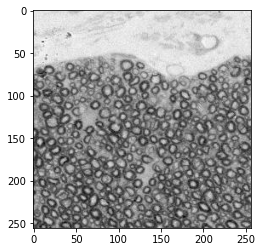

In [ ]:
# Add your implementation and discussion
import cv2

files = ["extra_point.png" ]
real_data = cv2.imread(path_folder+ files[0])

plt.imshow(real_data[:256, :256])